In [45]:
%pip install prophet


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [46]:
# STEP 2: Imports
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [47]:
df = pd.read_csv("/Users/chandhiny/Revised Code CS7CS5/monthly_totals_2014_2025.csv")

# Rename columns if necessary
df.rename(columns={
    'Month Year': 'ds',
    'Total Patients Waiting List': 'y'
}, inplace=True)

# Ensure correct types
df['ds'] = pd.to_datetime(df['ds'])
df['y'] = pd.to_numeric(df['y'], errors='coerce')
df.dropna(subset=['y'], inplace=True)

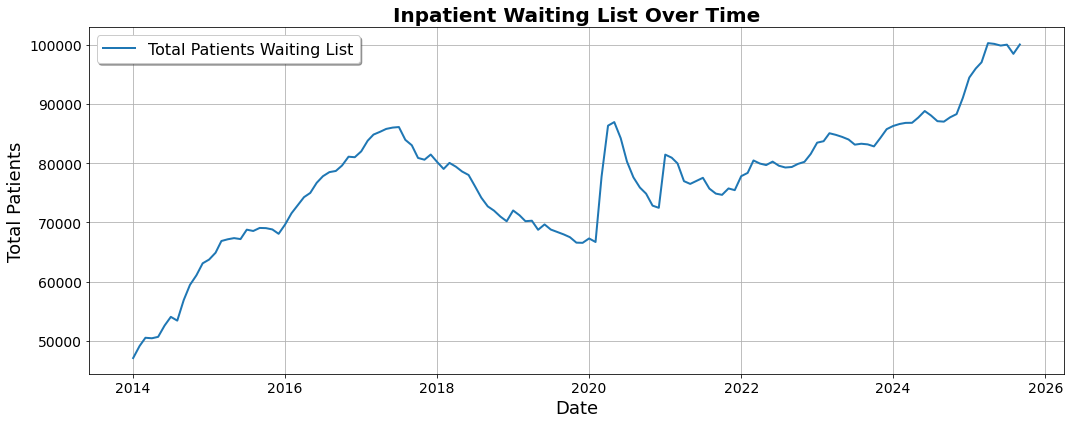

In [48]:
plt.figure(figsize=(15, 6))
plt.plot(df['ds'], df['y'], label='Total Patients Waiting List', linewidth=2)
plt.title('Inpatient Waiting List Over Time', fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total Patients', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True)
plt.legend(fontsize=16, frameon=True, shadow=True)
plt.tight_layout()
plt.show()

In [49]:
# STEP 5: Split data for evaluation
TEST_PERIODS = 12

train_df = df.iloc[:-TEST_PERIODS].copy()
test_df = df.iloc[-TEST_PERIODS:].copy()

print(f"Train: {train_df['ds'].min().date()} to {train_df['ds'].max().date()}")
print(f"Test: {test_df['ds'].min().date()} to {test_df['ds'].max().date()}")

Train: 2014-01-01 to 2024-09-01
Test: 2024-10-01 to 2025-09-01


In [50]:
# STEP 6: Fit Prophet on training data
model = Prophet()
model.fit(train_df)

20:57:58 - cmdstanpy - INFO - Chain [1] start processing
20:57:59 - cmdstanpy - INFO - Chain [1] done processing


In [51]:
# STEP 7: Forecast next 12 months
future = model.make_future_dataframe(periods=12, freq='MS')
forecast = model.predict(future)

# Display forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
128,2024-10-01,85769.065471,82284.811432,89244.741565
129,2024-11-01,86088.485191,82350.177160,89665.584453
130,2024-12-01,86239.993105,82831.643289,89748.266411
131,2025-01-01,89114.831673,85678.345462,93026.184192
132,2025-02-01,89088.696097,85269.671409,92702.234515
133,2025-03-01,89625.288244,85971.507820,93299.399934
134,2025-04-01,90609.511302,86890.681210,94546.102977
135,2025-05-01,90695.641058,87024.865330,94434.291323
136,2025-06-01,91156.223469,87671.838533,95026.569581
137,2025-07-01,90408.157676,86486.750010,94318.681644


In [52]:
# STEP 8: Evaluate against test set
predicted = forecast.set_index('ds').loc[test_df['ds'], 'yhat']
actual = test_df.set_index('ds')['y']

mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
mape = np.mean(np.abs((actual - predicted) / actual)) * 100
smape = 100/len(actual) * np.sum(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"sMAPE: {smape:.2f}%")

MAE: 7172.10
RMSE: 7720.78
MAPE: 7.34%
sMAPE: 7.66%


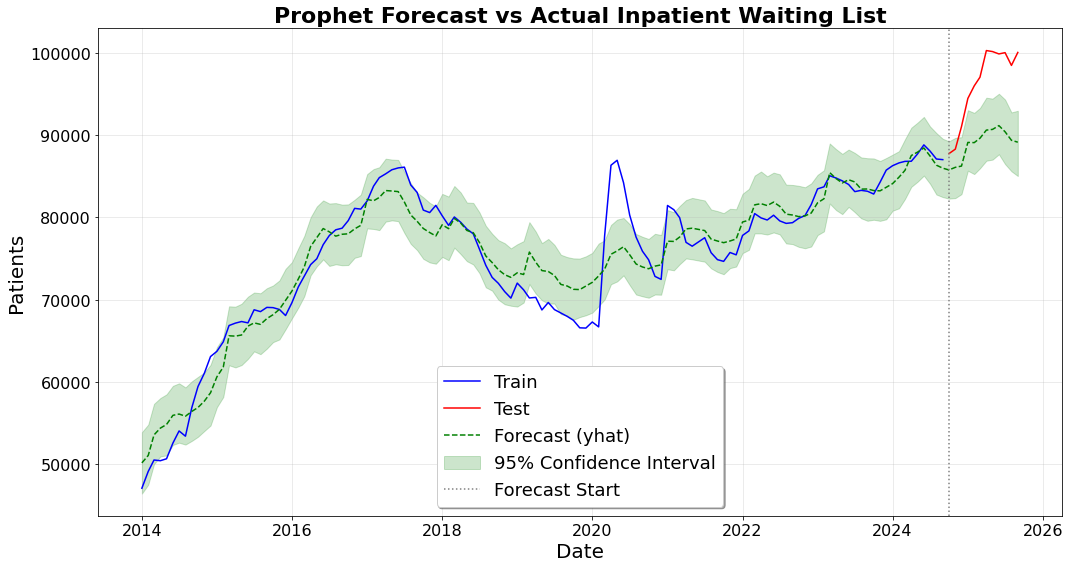

In [53]:
# STEP 9: Plot forecast vs actual
plt.figure(figsize=(15, 8))

plt.plot(train_df['ds'], train_df['y'], label='Train', color='blue')
plt.plot(test_df['ds'], test_df['y'], label='Test', color='red')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast (yhat)', color='green', linestyle='--')

plt.fill_between(
    forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'],
    color='green', alpha=0.2, label='95% Confidence Interval'
)

plt.axvline(test_df['ds'].min(), color='gray', linestyle=':', label='Forecast Start')
plt.title('Prophet Forecast vs Actual Inpatient Waiting List', fontsize=22, fontweight='bold')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Patients', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=18, frameon=True, shadow=True)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

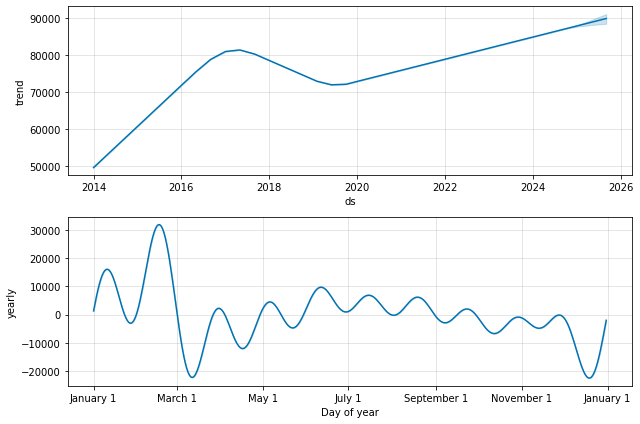

In [54]:
# STEP 10: Plot seasonal components (trend + seasonality)
fig2 = model.plot_components(forecast)
plt.tight_layout()
plt.show()

In [58]:
# STEP 11: Future Forecast (12 months beyond latest)
final_model = Prophet()
final_model.fit(df)

future_12 = final_model.make_future_dataframe(periods=12, freq='MS')
final_forecast = final_model.predict(future_12)

final_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

21:04:41 - cmdstanpy - INFO - Chain [1] start processing
21:04:41 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
140,2025-10-01,95812.549522,92274.353633,99411.273656
141,2025-11-01,96190.989163,92461.467920,99804.101900
142,2025-12-01,96993.172787,93206.177408,100737.413312
143,2026-01-01,99332.049452,95613.236202,103154.676078
144,2026-02-01,99963.279650,96011.565998,103622.551886
145,2026-03-01,102113.168879,98403.091665,105980.349297
146,2026-04-01,102490.901345,98722.303586,106280.263382
147,2026-05-01,102362.250872,98751.401428,105982.695001
148,2026-06-01,102856.976704,99315.387089,106794.986358
149,2026-07-01,102648.608951,98778.609586,106258.058505


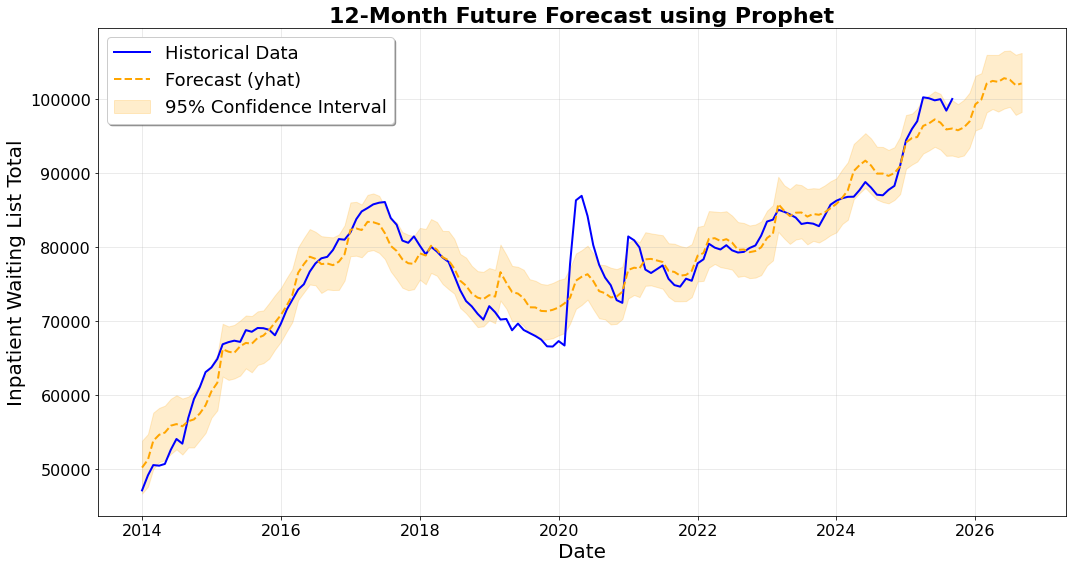

In [56]:
import matplotlib.pyplot as plt

# Plot forecast
fig, ax = plt.subplots(figsize=(15, 8))

# Plot historical data
ax.plot(df['ds'], df['y'], label='Historical Data', color='blue', linewidth=2)

# Plot future forecast
ax.plot(final_forecast['ds'], final_forecast['yhat'], label='Forecast (yhat)', color='orange', linestyle='--', linewidth=2)

# Plot confidence interval
ax.fill_between(final_forecast['ds'], 
                final_forecast['yhat_lower'], 
                final_forecast['yhat_upper'], 
                color='orange', alpha=0.2, label='95% Confidence Interval')

# Format plot
ax.set_title("12-Month Future Forecast using Prophet", fontsize=22, fontweight='bold')
ax.set_xlabel("Date", fontsize=20)
ax.set_ylabel("Inpatient Waiting List Total", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.legend(fontsize=18, loc='upper left', frameon=True, shadow=True)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()